# HOG Features
This notebook contains exploration & experimentation with extracting Histogram of Gradients for use as features in our models. HoG was not used in the final model due to lacking rotational invariance.

# Plots/histograms for color and pixel intensity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_split_images, plot_color_histogram, get_mean_intensity_rgb

In [2]:
train, val, test = load_split_images('../OfficeCaltechDomainAdaptation/images/')

In [3]:
np.unique(train[0])

array(['amazon', 'caltech10'], dtype='<U9')

In [4]:
np.unique(train[1])

array(['backpack', 'bike', 'calculator', 'headphones', 'keyboard',
       'laptop', 'monitor', 'mouse', 'mug', 'projector'], dtype='<U10')

In [5]:
np.unique(train[2])
train[2]

array(['../OfficeCaltechDomainAdaptation/images/caltech10/mouse/047_0075.jpg',
       '../OfficeCaltechDomainAdaptation/images/caltech10/headphones/101_0057.jpg',
       '../OfficeCaltechDomainAdaptation/images/amazon/keyboard/frame_0020.jpg',
       ...,
       '../OfficeCaltechDomainAdaptation/images/caltech10/bike/224_0066.jpg',
       '../OfficeCaltechDomainAdaptation/images/caltech10/calculator/027_0045.jpg',
       '../OfficeCaltechDomainAdaptation/images/caltech10/mug/041_0050.jpg'],
      dtype='<U73')

In [6]:
train[3][1][1].shape
# train[3][1]

(193, 3)

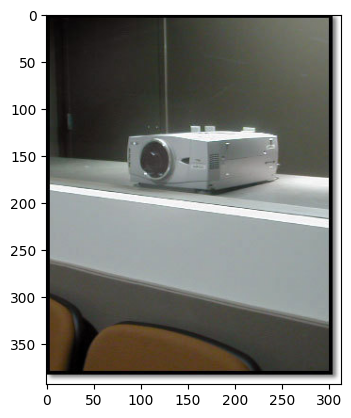

In [7]:
plt.imshow(train[3][3])

mouse


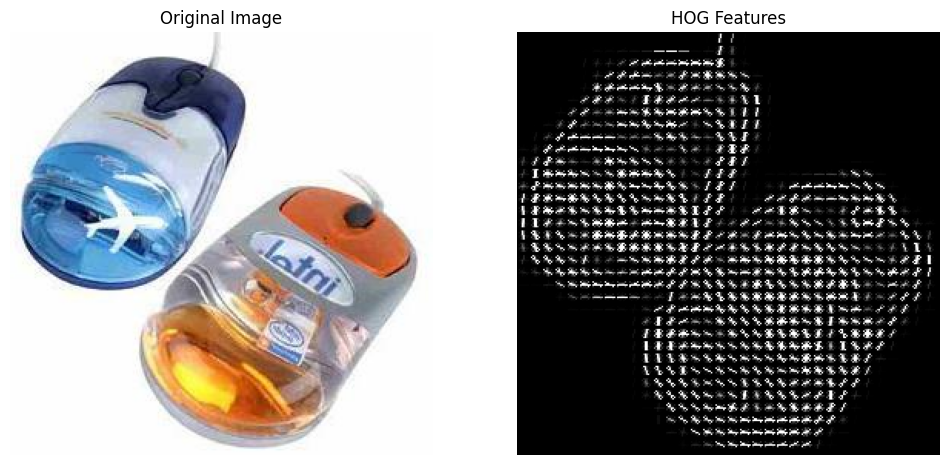

headphones


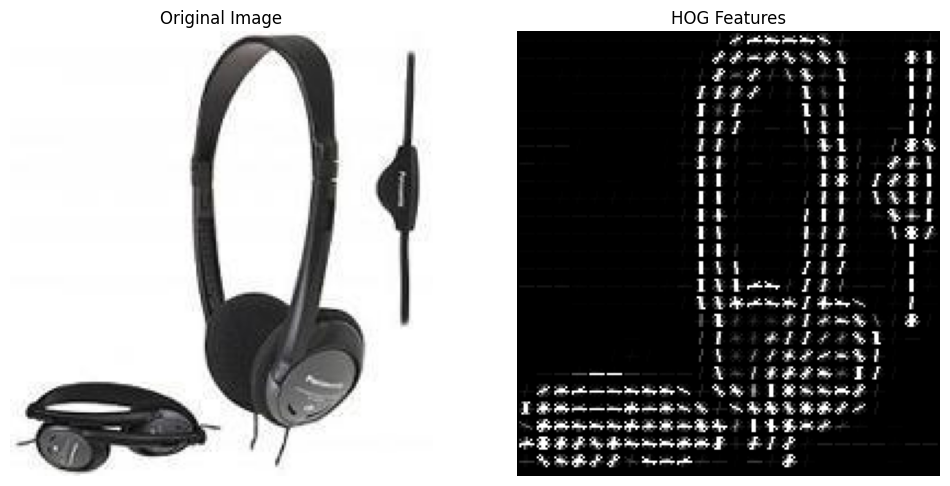

keyboard


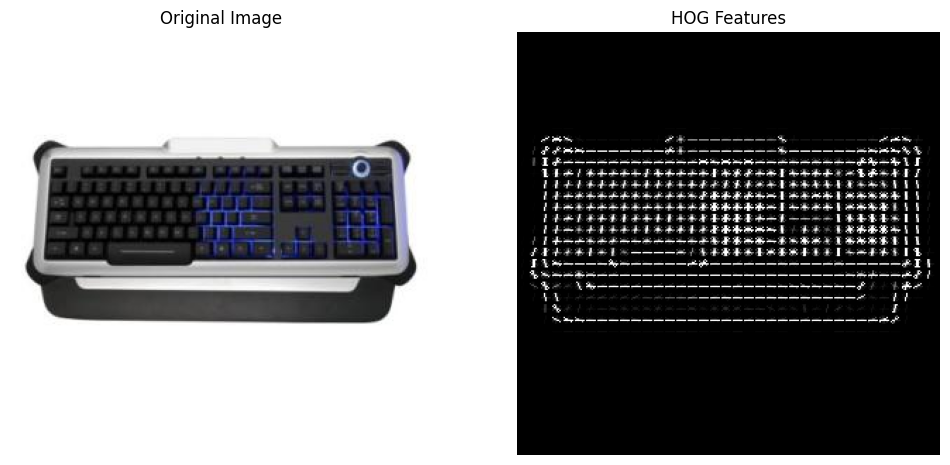

projector


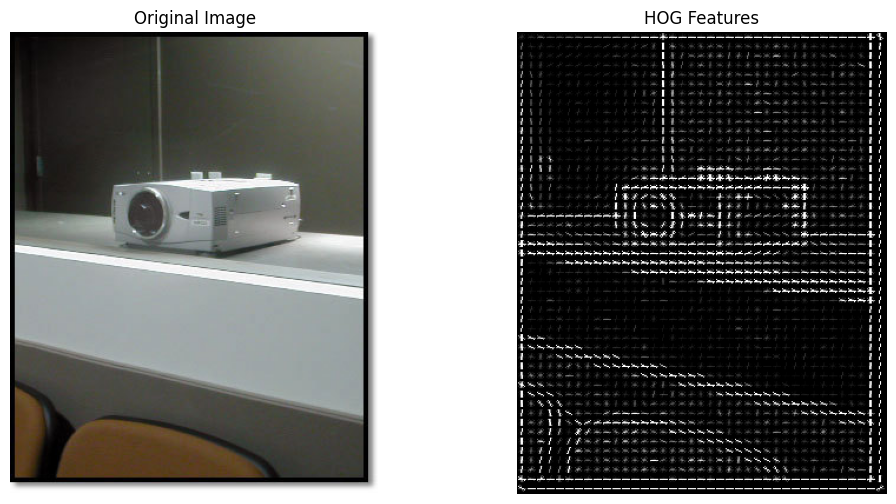

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

def show_hog_features(image):
    # Compute HOG features and their visualization
    hog_features, hog_image = hog(
        image, 
        pixels_per_cell=(8, 8), 
        cells_per_block=(2, 2), 
        visualize=True, 
        channel_axis=-1
    )

    # Rescale the HOG image for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Display the original image and the HOG features
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[1].set_title('HOG Features')
    ax[1].axis('off')

    # ax[3].imshow(hog_image_rescaled, cmap=plt.cm.gray)

    plt.show()

# Display the HOG features of the first image in the training set

for i in range(4):
    print(train[1][i])
    show_hog_features(train[3][i])
